In [34]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import os

os.chdir("/content/drive/MyDrive/ML/DATA")

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv(r'Advertising.csv', index_col=0,header=0)
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [38]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [39]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [40]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [41]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

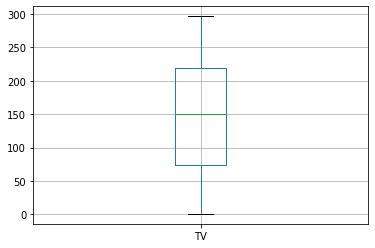

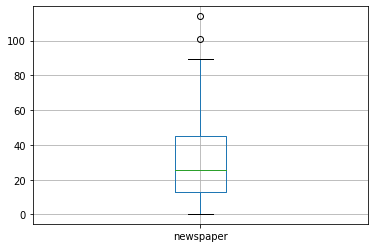

In [42]:
#Assumption 1: there should be no outliers in the data
#check using boxplot

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

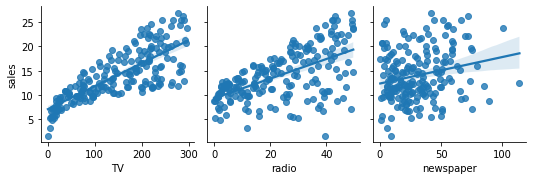

In [43]:
#Assumption 2: Assumption of linearity:every ind var should have a
#linear relationship with the dep var 

sns.pairplot(data,x_vars
             =['TV','radio','newspaper'],
             y_vars="sales",kind='reg')

we can eliminate those variable which doesn't show the relationship with dependent variables this is use for feature selection


In [44]:
#tv and radio shows postive realtion ship where as newspaper don't show relationship

In [45]:
#data.drop(["newspaper"],axis=1,inplace=True)......we can elemenate those variable which  do not show  relationship with dependendent variavable, this will help in feature selection

### **date** :- 5/11/2022```



In [46]:
#data.columns ( will show the all the data eg tv, newspaper, sales )

In [47]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [48]:
#create x and y
x=data[['TV','radio','newspaper']] 
y=data['sales']

#x=data.iloc[:,0:-1] #[rows , column]
#y=data.iloc[:,-1] [if we take normal :-1 then it will take last column only][if we take range like 0:-1 it will take 0,-1 2nd last]


# X = data.iloc[:,0:-1] #[rows,column] when range is specified the last mentioned is exclusive  
# Y = data.iloc[:,-1] #[rows,column] when range is not specified the last mentioned is inclusive

In [49]:
print(x.shape)
print(y.shape) #one mein nhi karta eg (200, 3) (200,)


(200, 3)
(200,)


In [50]:
import warnings
warnings.filterwarnings("ignore")

#it will ignore the waring pop up 


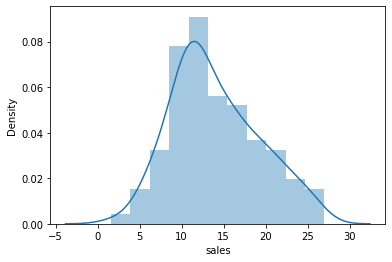

In [51]:
#assumption of Normality: the dependent variable should follow on 
#approximate normal distribution

sns.distplot(y)

In [52]:
# log transformation
# if Y prediction is highly squed the we use log transformation
"""
#log transformation
import numpy as np
y_log = np.log(y)
"""

'\n#log transformation\nimport numpy as np\ny_log = np.log(y)\n'

In [53]:
#sns.distplot(y_log, hist=true)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f0b63bd10>,
      dtype=object)

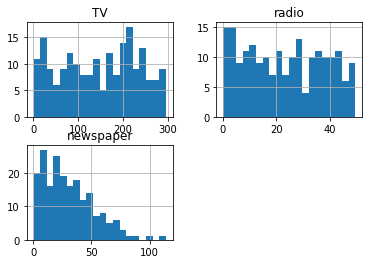

In [54]:
x.hist(bins=20)

# bins taken 20 bcz we want 20 binns 

In [55]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna())) #(to drop null na value)
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
#low skewness = 0 to 0.50 and 0 to -0.5
#moderate skewness = 0.50 to 0.75 to -0.50 to -0.75
#high skewness = > 0.75 and <-0.75
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index]) # if the variable consist of 0 Vales we should use log1p and not
# log bcz log will take infinite value and then it'll show error
# for a safe side always use log1p
# In this step we are removing highly skewed values which are equal to zero from the data for safety purpose

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [56]:
#Assumption of no multicollinearity: there should be no multicollinearity
#Between the independ variables
#multicollinarity is the relationship amomg the independent variables

corr_df=x.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)


# if the pair of hight co-rrelaation found we can drop 1 variable out of it (after logically thinking) this help feature selection )
# value closer to 1 indicates high correlATION , In our case we want the less dependency within independent variables

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] =  x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]    #will do einter inration #.shape[1] will show column 
                                                                        #(x.values, i) () 
vif_df.round(2)

 


features  VIF Factor
0         TV        3.39
1      radio        3.63
2  newspaper        5.44

In [58]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code



In [59]:
from sklearn.model_selection import train_test_split

#split the data into test and train
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=10) #formaula #10 is values which can we use for same outcome with team we can we use any value


In [1]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

NameError: ignored

In [61]:
from sklearn.linear_model import LinearRegression 
# create a amodel object
lm = LinearRegression()
#train the model object 
lm.fit(x_train, y_train)

#print intercept and coefficients
print(lm.intercept_) #b=B0 beta0 
print(lm.coef_)

3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]


In [62]:
#pair the feature names with the coefficienrs

print(list(zip(x.columns, lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.1930370789734529), ('newspaper', -0.04895136822248782)]


In [63]:
#after the model is ready and then boss want to see what if we invent 100$ more what will profit then

x1=100
x2=200
x3=np.log1p(0) #np.log1p() bcz we are done log transfer in train
y_pred=3.3532913858151545+(0.0437425*x1)+(0.19303708*x2)+(-0.04895137*x3)
print(y_pred)

46.33495738581516


In [64]:
#use for branch of data
#predict using the model
y_pred=lm.predict(x_test)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [65]:
lm.score(x_train, y_train)

0.9208986647500219

In [66]:
#this values will always towordds to higher side bcz the training are already train
#score function will always give comparatively hight bcz the training data is already know to the model

lm.score(x_train, y_train)

#y_pred=lm.predict(x_train)
#score=r2_score(y_train,y_pred)

0.9208986647500219

In [67]:
new_df=pd.DataFrame()  #creating data frame
new_df=x_test.copy()   #puting X_test data in data frame
new_df["Actual sales"]=y_test  #putting Actual sales in Y_test(variable)
new_df["Predicted sales"]=y_pred  #putting Predicted sales in Y_test(variable)
new_df

TV  radio  newspaper  Actual sales  Predicted sales
60   210.7   29.5   2.332144          18.4        18.150269
6      8.7   48.9   4.330733           7.2        12.961369
21   218.4   27.7   3.996364          18.0        18.058153
199  283.6   42.0   4.207673          25.5        23.660251
53   216.4   41.7   3.703768          22.6        20.687510
20   147.3   23.9   3.000720          14.6        14.263259
163  188.4   18.1   3.280911          14.9        14.927745
56   198.9   49.4   4.110874          23.7        21.388474
70   216.8   43.9   3.339322          22.3        21.147529
3     17.2   45.9   4.252772           9.3        12.757885
99   289.7   42.3   3.955082          25.4        23.997356
11    66.1    5.8   3.226844           8.6         7.206327
76    16.9   43.7   4.504244           8.7        12.307771
143  220.5   33.2   3.660994          20.1        19.228133
125  229.5   32.3   4.320151          19.7        19.415816
64   102.7   29.6   2.240710          14.0        13.449858
110  255.4   26.9   1.871802          19.8        19.626196
79     5.4   29.9   2.341806           5.3         9.246675
112  241.7   38.0   3.186353          21.8        21.105287
186  205.0   45.1   3.025291          22.6        20.878384
155  187.8   21.1   2.351375          15.6        15.526113
131    0.7   39.6   2.272126           1.6        10.916956
62   261.3   42.7   4.019980          24.2        22.829107
88   110.7   40.6   4.162003          16.0        15.829156
103  280.2   10.1   3.109061          14.8        17.407422
122   18.8   21.7   3.939638           7.0         8.171704
137   25.6   39.0   2.332144           9.5        11.887384
2     44.5   39.3   3.830813          10.4        12.698666
48   239.9   41.5   2.970414          23.2        21.712750
173   19.6   20.1   2.890372           7.6         7.949202
160  131.7   18.4   3.572346          12.9        12.491190
40   228.0   37.7   3.496508          21.5        20.432921
77    27.5    1.6   3.077312           6.9         4.714431
92    28.6    1.5   3.526361           7.3         4.721262
36   290.7    4.1   2.251292          12.8        16.750485
179  276.7    2.3   3.206803          11.8        15.743849
128   80.2    0.0   2.322388           8.8         6.747756
170  284.3   10.6   2.001480          15.0        17.737502
47    89.7    9.9   3.602777          10.6         9.011700
175  222.4    3.4   2.646175          11.5        13.608416

In [68]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [69]:
#rmsc should be min side is good

print(y_test.min())
print(y_test.max())

1.6
25.5


In [70]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

TV  radio  newspaper  Actual sales  Predicted sales  Deviation
60   210.7   29.5   2.332144          18.4        18.150269   0.249731
6      8.7   48.9   4.330733           7.2        12.961369  -5.761369
21   218.4   27.7   3.996364          18.0        18.058153  -0.058153
199  283.6   42.0   4.207673          25.5        23.660251   1.839749
53   216.4   41.7   3.703768          22.6        20.687510   1.912490

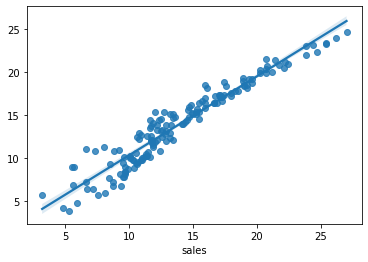

In [71]:
sns.regplot(x=y_train,y=lm.predict(x_train),ci=95)
#ci is confidence interval(the shaded part is ci its pretty sure that the values liying in that area are accurate)

# **Date:- 6/11/2022**

In [72]:


from sklearn.model_selection import train_test_split

#split the data into test and train
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=10)

In [73]:


from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

"""
previous values:
3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]
"""


3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


'\nprevious values:\n3.3532913858151545\n[ 0.0437425   0.19303708 -0.04895137]\n'

In [74]:
y_pred=lm.predict(x_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


In [76]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [77]:
y_pred=lm.predict(x_test)

In [78]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


# **OLS---> OLS(Y_train, x_train) ---> sklearn**
#**ols---> ols(y~X1=X2) ---> statis**

In [79]:
#fit(x_train, y_train)---> sklearn
#y~x1+x2+x3, data=df--> statsmodel

In [80]:
new_df=pd.DataFrame()
new_df=x_train.copy()

new_df["sales"]=y_train.copy()
new_df.shape

(160, 4)

In [81]:
#linear regression is not applicable when we have +ve or -ve autocorelation
#from statsmodels.stats.stattools import durbin_watson
##perform Durbin-Watson test
#durbin_watson(model.resid)


import statsmodels.formula.api as sm
#create a fitted model with all three feature
lm_model = sm.ols(formula='sales~ TV + radio + newspaper',data=new_df).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())


"""
previous values:
3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]
"""



Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.10e-85
Time:                        04:07:23   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\nprevious values:\n3.3532913858151545\n[ 0.0437425   0.19303708 -0.04895137]\n'

In [82]:

#pred to the y
y_pred=lm_model.predict(x_test)

In [83]:
 y_pred=lm_model.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035377
RMSE: 2.5929769110930154
Adj R-square: 0.832272516881653


we are training a data by removing the newspaper

In [84]:
#we are training a data by removing the newspaper

import statsmodels.formula.api as sm
#create a fitted model with all three feature
lm_model = sm.ols(formula='sales~ TV + radio',data=new_df).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())


"""
previous values:
3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]
"""



Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           3.47e-87
Time:                        04:07:23   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

'\nprevious values:\n3.3532913858151545\n[ 0.0437425   0.19303708 -0.04895137]\n'

In [85]:
 y_pred=lm_model.predict(x_test)
 

In [86]:
 y_pred=lm_model.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


# ** post model assumption**

In [87]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



#Residual v/s Fitted plot the line fited into error point should me random and should not follow a wave like pattern

Text(0, 0.5, 'Residuals')

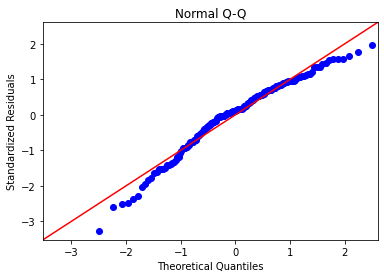

In [88]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

# the error point are being compared standard normal distributed data , the error point follow the red daigonal kine that indicates the eroor following. NORMAL distribution 

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

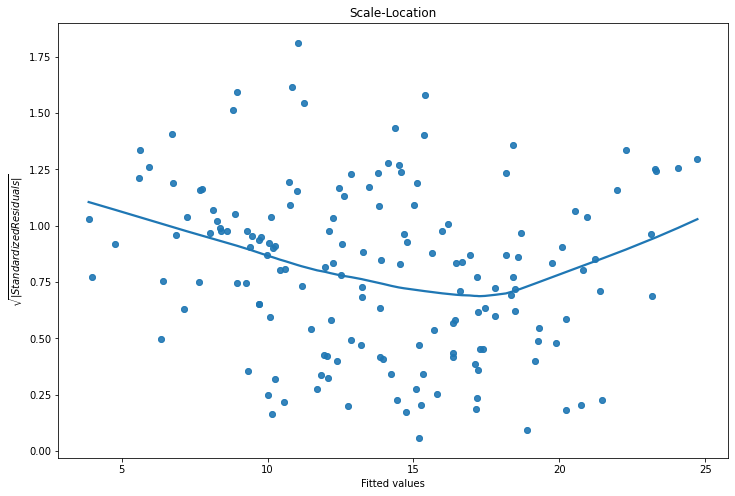

In [89]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


# we are trying to check variance across error points an approximately horizontal lines indicates that the variance is constant
# through the errors what we dont want is a steep curve beacause that will indicate hetroscadicity (constant variance is not seen)

In [90]:
# we are trying to check variance across error points an approximately horizontal lines indicates that the variance is constant
# through the errors what we dont want is a steep curve beacause that will indicate hetroscadicity (constant variance is not seen)

# ***12/11/2022**

In [91]:
#pd.options.display.float_formate = '[:.2f]'.format
np.set_printoptions(suppress=True)

In [94]:
# create X and Y
x=data[['TV','radio','newspaper']]
y=data['sales']

In [96]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #(point to StandardScaler)
x=scaler.fit_transform(x)  #done on x bcz x have multi variables
#scaler.fit(x) 
#x=scaler.transform(x)
print(x)

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]
 [-1.04557682  0.64390467 -0.32470841]
 [-0.31343659 -0.24740632 -0.87248699]
 [-1.61657614 -1.42906863 -1.36042422]
 [ 0.61604287 -1.39530685 -0.43058158]
 [-0.94515567 -1.17923146 -0.29248614]
 [ 0.79002835  0.04969734 -1.22232878]
 [-1.4390876   0.79920886  1.62704048]
 [-0.57850171 -1.05768905 -1.07502697]
 [ 0.66625345  0.65065703  0.71100739]
 [ 0.56466461  1.65000572  1.02862691]
 [-0.92530498  0.9004942   3.84117072]
 [ 1.56887609  1.10306488  1.16211917]
 [-0.90895735 -0.18663512 -0.56407384]
 [ 0.0030068   0.04294498 -0.52724839]
 [ 0.8332328   0.29953451  1.05164281]
 [ 1.05509347 -1.22649795 -0.32470841]
 [-1.5628625  -0.4972435   0.87672192]
 [ 0.94883389 -0.42971994 -0.20042252]
 [-0.98952781 -0.72007125 -0.56407384]
 [ 1.35285385 -1.33453565

In [97]:


from sklearn.model_selection import train_test_split

#split the data into test and train
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=10)

In [98]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.1,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(x_train,y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)



[14.00056539]
[3.96282177 2.9563359  0.02107504]


In [103]:
y_pred=lm.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8440514160249312
RMSE: 2.5193340417009136
Adj R-square: 0.8416644479028638


In [106]:
pd.set_option('display.float_format','{:.4f}'.format)

In [107]:
lm.n_iter_ # total no of epoch

11

In [108]:
lm.t_ #160*11 =1761

1761.0

In [109]:
"""
SGD: 2 stopping criteries:
1.Zero convergence reached
2.Max_iter reached
"""

'\nSGD: 2 stopping criteries:\n1.Zero convergence reached\n2.Max_iter reached\n'